# Mini Project 1 Code

## Implementation of Genetic Algorithm

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random

### Define the function f(x)

In [2]:
def fx(x):
    fx = x * np.sin(10 * np.pi * x) + 1
    return fx

### Generat original population 

In [3]:
def oringinalPopulation(num, xmin = -0.5, xmax = 1):
    np.random.seed(0)
    np.set_printoptions(precision=4)
    oringinalPopulation = np.random.uniform(xmin, xmax, num)
    return oringinalPopulation

### Encode

In [4]:
def GAEncode(population, xmin = -0.5, xmax = 1, scale = 2**18, encodelength = 18):
    normalized = (population - xmin) / (xmax - xmin) * scale
    encode = []
    for x in normalized.astype(int):
        newencode = np.binary_repr(x, width = encodelength)
        encode = np.append(encode,newencode)
    encode = np.array(encode)
    return encode

### Decode

In [5]:
def GADecode(populationcode, xmin = -0.5, xmax = 1, scale = 2**18):
    decode = []
    for x in populationcode:
        newdecode = (int(x, base = 2) / scale * 1.5) + xmin
        decode = np.append(decode,newdecode)
    decode = np.array(decode)
    decode = np.round(decode,4)
    return decode

### Select (roulette wheel selection)

In [6]:
def GASelect(parents, fitness, prob=0.6):
    
    probs = fitness/np.sum(fitness)
    cumsumprobs = np.cumsum(probs)
    uniformrand = np.random.uniform(size=len(fitness))
    select = []
    for rand in uniformrand:
        newselect = parents[np.where(rand < cumsumprobs)[0][0]]
        select = np.append(select ,newselect)
    select = np.array(select )
    
    return select

### Crossover

In [7]:
def GACrossover(parents,prob=0.6):
    
    crossparents = np.random.permutation(int(len(parents)*prob//2*2)).reshape(-1, 2)
    crosspoint = len(parents[0])//2
    for i, j in crossparents:
        x, y = parents[i], parents[j]
        parents[i] = x[:crosspoint] + y[crosspoint:]
        parents[j] = y[:crosspoint] + x[crosspoint:]
        crossover = parents
        
    return crossover

### Mutate

In [8]:
def GAMutate(parents, prob = 0.1):
    
    chromslength = len(parents[0])
    m = {'0':'1', '1':'0'}
    newgeneration = []
    each_prob = np.random.uniform(size=len(parents))
    for i, parents in enumerate(parents):
        if each_prob[i] < prob:
            prochroms = np.random.randint(chromslength)    
            parents = parents[:prochroms] + m[parents[prochroms]] + parents[prochroms+1:]
        newgeneration.append(parents)
        mutate = np.array(newgeneration)
    return mutate

## Question 1

In [9]:
np.random.seed(0)
population = oringinalPopulation(100)
parents = GAEncode(population)
maxsol = pd.DataFrame(columns=['Generation','maxindex', 'maxfitness', 'maxchrom', 'maxdechrom']) 
minsol = pd.DataFrame(columns=['Generation','minindex', 'minfitness', 'minchrom', 'mindechrom']) 
averagesol = pd.DataFrame(columns=['Generation', 'averagefitness']) 


for i in range(1000):
    #fitness = fx(GADecode(chroms))
    fitness = fx(GADecode(parents))
    dechroms = GADecode(parents)
    
    maxindex= int(np.argwhere(fitness == max(fitness))[0])
    maxfitness = round(max(fitness),4)
    maxchrom = parents[maxindex]
    maxdechrom = round(float(dechroms[maxindex]),4)
    
    minindex= int(np.argwhere(fitness == min(fitness))[0])
    minfitness = round(min(fitness),4)
    minchrom = parents[minindex]
    mindechrom = round(float(dechroms[minindex]),4)

    max_new = pd.DataFrame({'Generation':i,'maxindex':maxindex,'maxfitness':maxfitness,'maxchrom':maxchrom,'maxdechrom':maxdechrom},index=[0])
    maxsol=maxsol.append(max_new,ignore_index=True)
    
    min_new = pd.DataFrame({'Generation':i,'minindex':minindex,'minfitness':minfitness,'minchrom':minchrom,'mindechrom':mindechrom},index=[0])
    minsol=minsol.append(min_new,ignore_index=True)
    
    average_new = pd.DataFrame({'Generation':i, 'averagefitness': np.average(fitness)},index=[0])
    averagesol=averagesol.append(average_new,ignore_index=True)
        
    newgeneration = GAMutate(GACrossover(GASelect(parents, fitness)))
    
    parents = newgeneration

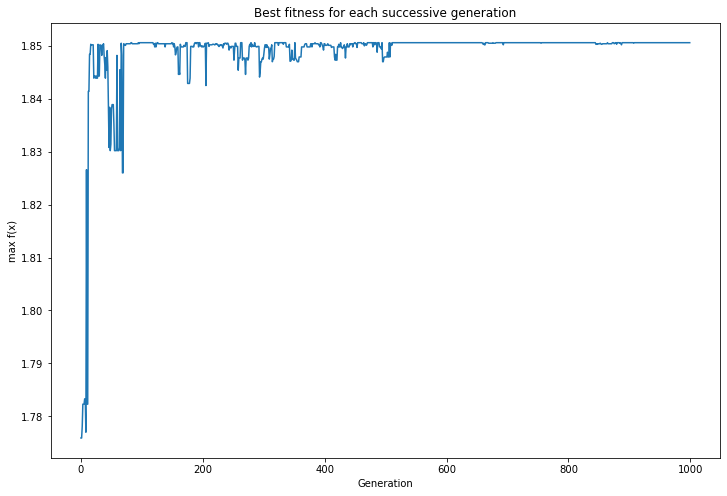

In [10]:
plt.figure(figsize=(12,8))
plt.plot(maxsol["Generation"],  maxsol["maxfitness"])
plt.title(label= "Best fitness for each successive generation")
plt.xlabel("Generation")
plt.ylabel("max f(x)")
plt.show()

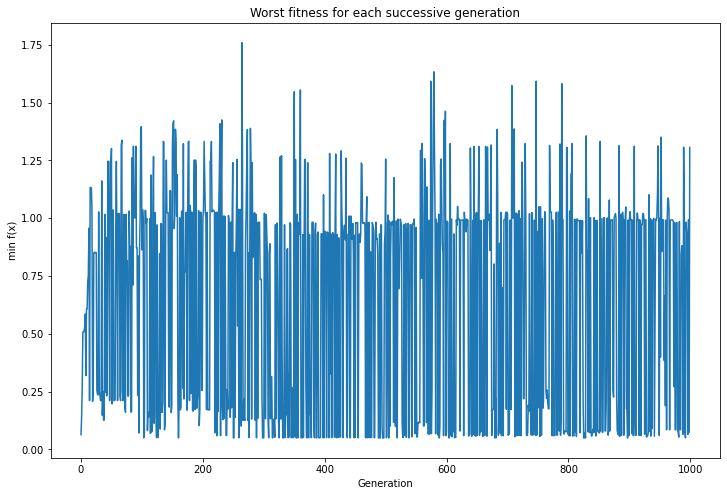

In [11]:
plt.figure(figsize=(12,8))
plt.plot(minsol["Generation"],  minsol["minfitness"])
plt.title(label= "Worst fitness for each successive generation")
plt.xlabel("Generation")
plt.ylabel("min f(x)")
plt.show()

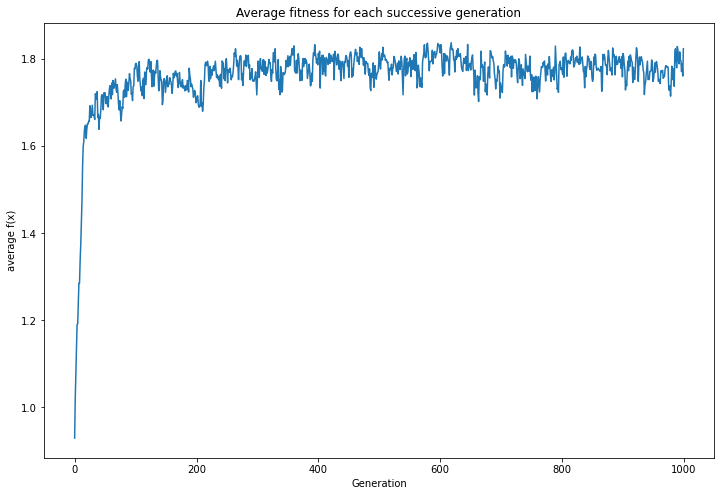

In [12]:
plt.figure(figsize=(12,8))
plt.plot(averagesol["Generation"],  averagesol["averagefitness"])
plt.title(label= "Average fitness for each successive generation")
plt.xlabel("Generation")
plt.ylabel("average f(x)")
plt.show()

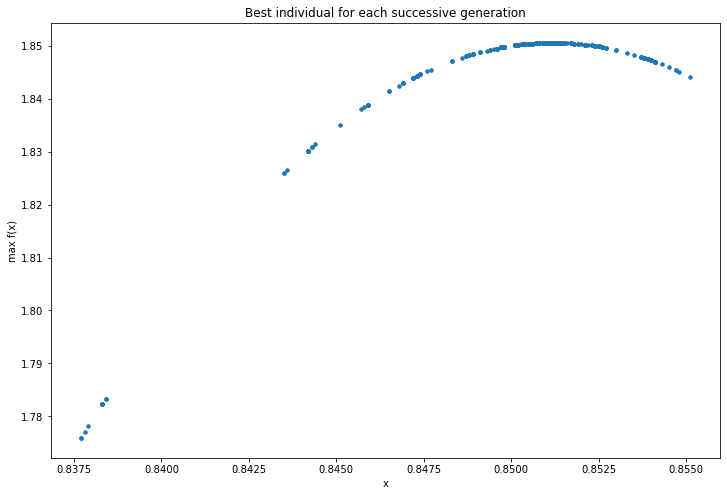

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(maxsol["maxdechrom"],  maxsol["maxfitness"],s=12)
plt.title(label= "Best individual for each successive generation")
plt.xlabel("x")
plt.ylabel("max f(x)")
plt.show()

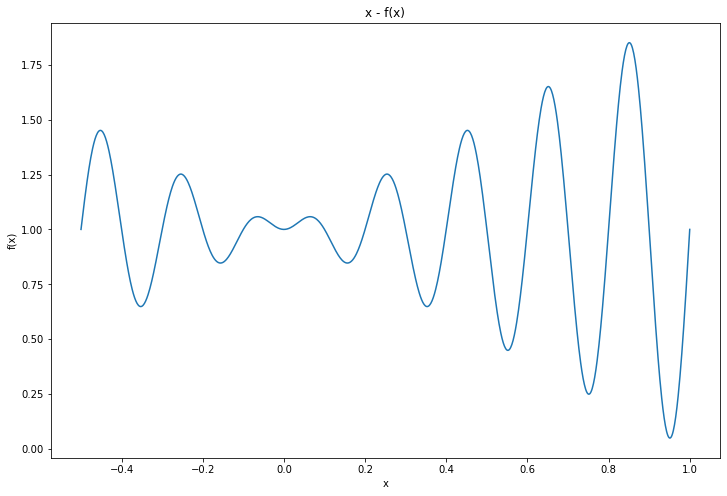

In [14]:
Xs = np.linspace(-0.5, 1, 1000)
plt.figure(figsize=(12,8))
plt.plot(Xs, fx(Xs))
plt.title(label= "x - f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

## Question 2

In [15]:
np.random.seed(0)
population = oringinalPopulation(100)
parents = GAEncode(population)
maxsol = pd.DataFrame(columns=['Generation','maxindex', 'maxfitness', 'maxchrom', 'maxdechrom']) 
minsol = pd.DataFrame(columns=['Generation','minindex', 'minfitness', 'minchrom', 'mindechrom']) 
averagesol = pd.DataFrame(columns=['Generation', 'averagefitness']) 


for i in range(1000):
    #fitness = fx(GADecode(chroms))
    fitness = fx(GADecode(parents))
    dechroms = GADecode(parents)
    
    maxindex= int(np.argwhere(fitness == max(fitness))[0])
    maxfitness = round(max(fitness),4)
    maxchrom = parents[maxindex]
    maxdechrom = round(float(dechroms[maxindex]),4)
    
    minindex= int(np.argwhere(fitness == min(fitness))[0])
    minfitness = round(min(fitness),4)
    minchrom = parents[minindex]
    mindechrom = round(float(dechroms[minindex]),4)

    max_new = pd.DataFrame({'Generation':i,'maxindex':maxindex,'maxfitness':maxfitness,'maxchrom':maxchrom,'maxdechrom':maxdechrom},index=[0])
    maxsol=maxsol.append(max_new,ignore_index=True)
    
    min_new = pd.DataFrame({'Generation':i,'minindex':minindex,'minfitness':minfitness,'minchrom':minchrom,'mindechrom':mindechrom},index=[0])
    minsol=minsol.append(min_new,ignore_index=True)
    
    average_new = pd.DataFrame({'Generation':i, 'averagefitness': np.average(fitness)},index=[0])
    averagesol=averagesol.append(average_new,ignore_index=True)
        
    newgeneration = GAMutate(GASelect(parents, fitness))
    
    parents = newgeneration

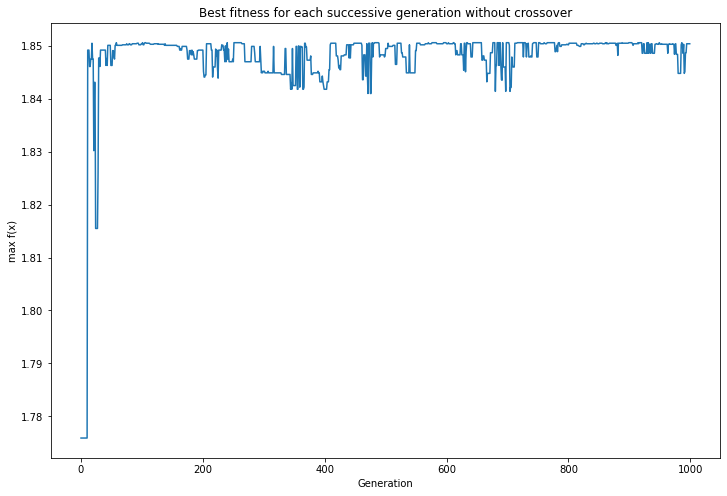

In [16]:
plt.figure(figsize=(12,8))
plt.plot(maxsol["Generation"],  maxsol["maxfitness"])
plt.title(label= "Best fitness for each successive generation without crossover")
plt.xlabel("Generation")
plt.ylabel("max f(x)")
plt.show()

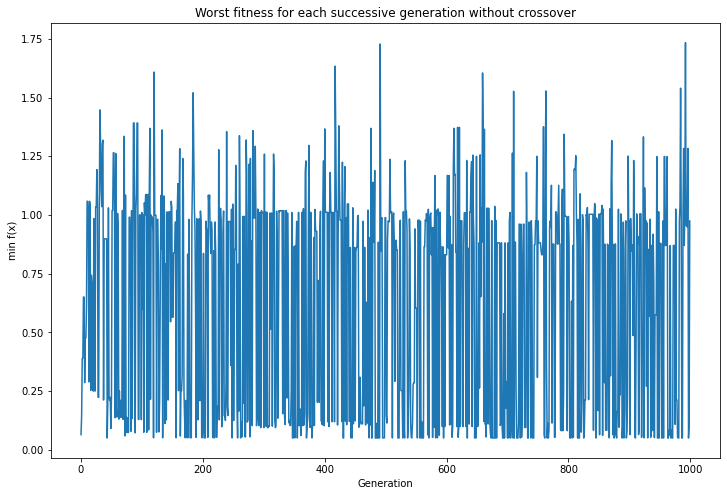

In [17]:
plt.figure(figsize=(12,8))
plt.plot(minsol["Generation"],  minsol["minfitness"])
plt.title(label= "Worst fitness for each successive generation without crossover")
plt.xlabel("Generation")
plt.ylabel("min f(x)")
plt.show()

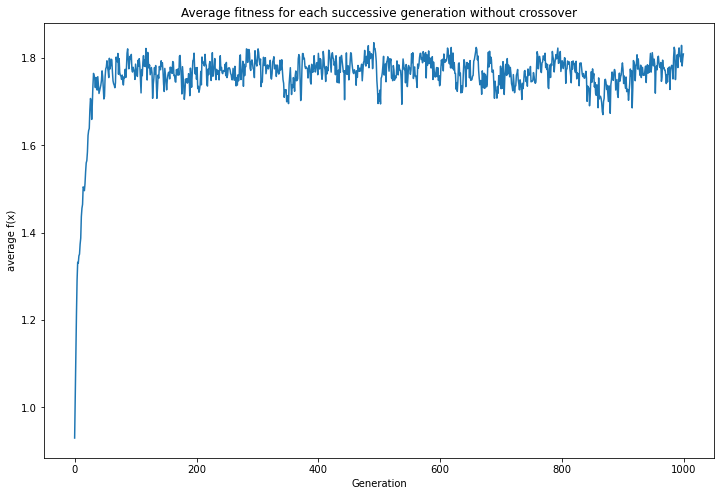

In [18]:
plt.figure(figsize=(12,8))
plt.plot(averagesol["Generation"],  averagesol["averagefitness"])
plt.title(label= "Average fitness for each successive generation without crossover")
plt.xlabel("Generation")
plt.ylabel("average f(x)")
plt.show()

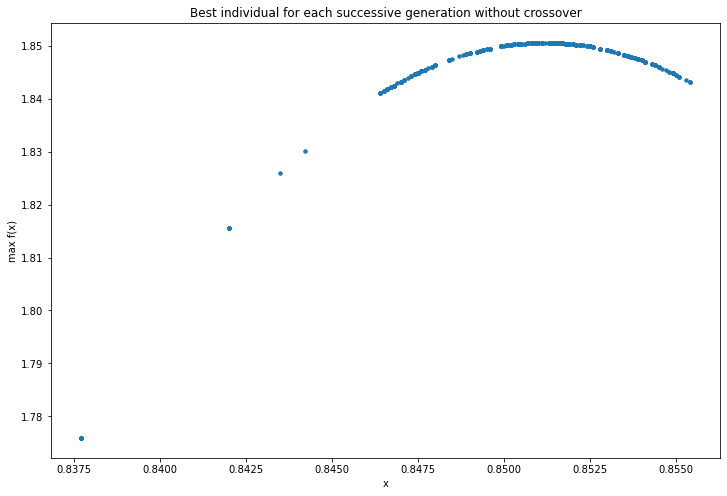

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(maxsol["maxdechrom"],  maxsol["maxfitness"],s=12)
plt.title(label= "Best individual for each successive generation without crossover")
plt.xlabel("x")
plt.ylabel("max f(x)")
plt.show()